In [1]:
import sys
import os

# Define the path to your folder
folder_path = f'..\\..\\..\\Models\\AutoDiffusion' 

# Add the folder to sys.path
sys.path.append(folder_path)

In [2]:
import numpy as np
#import process_edited as pce
import process_GQ as pce
import autoencoder as ae
import diffusion as diff
import TabDDPMdiff as TabDiff
import pandas as pd
import torch
import os
import time
import numpy as np

Recall Score for AutoDiff Autoencoder & ForestDIffusion for diabetes dataset


  0%|          | 0/100 [00:00<?, ?it/s]

Class distribution before augmentation: {0: 500, 1: 268}
Class distribution after augmentation: {0.0: 500, 1.0: 536}
Recall Score for AutoDiff Autoencoder & ForestDIffusion for diabetes dataset


  0%|          | 0/400 [00:00<?, ?it/s]

Class distribution before augmentation: {0: 500, 1: 268}
Class distribution after augmentation: {0.0: 500, 1.0: 536}
Recall Score for AutoDiff Autoencoder & ForestDIffusion for diabetes dataset


  0%|          | 0/700 [00:00<?, ?it/s]

Class distribution before augmentation: {0: 500, 1: 268}
Class distribution after augmentation: {0.0: 500, 1.0: 536}
Recall Score for AutoDiff Autoencoder & ForestDIffusion for diabetes dataset


  0%|          | 0/1000 [00:00<?, ?it/s]

Class distribution before augmentation: {0: 500, 1: 268}
Class distribution after augmentation: {0.0: 500, 1.0: 536}
Recall Score for AutoDiff Autoencoder & ForestDIffusion for diabetes dataset


  0%|          | 0/1500 [00:00<?, ?it/s]

Class distribution before augmentation: {0: 500, 1: 268}
Class distribution after augmentation: {0.0: 500, 1.0: 536}
Recall Score for AutoDiff Autoencoder & ForestDIffusion for diabetes dataset


  0%|          | 0/2000 [00:00<?, ?it/s]

Class distribution before augmentation: {0: 500, 1: 268}
Class distribution after augmentation: {0.0: 500, 1.0: 536}
Recall Score for AutoDiff Autoencoder & ForestDIffusion for diabetes dataset


  0%|          | 0/2500 [00:00<?, ?it/s]

Class distribution before augmentation: {0: 500, 1: 268}
Class distribution after augmentation: {0.0: 500, 1.0: 536}
Recall Score for AutoDiff Autoencoder & ForestDIffusion for diabetes dataset


  0%|          | 0/3000 [00:00<?, ?it/s]

Class distribution before augmentation: {0: 500, 1: 268}
Class distribution after augmentation: {0.0: 500, 1.0: 536}
Recall Score for AutoDiff Autoencoder & ForestDIffusion for diabetes dataset


  0%|          | 0/3500 [00:00<?, ?it/s]

Class distribution before augmentation: {0: 500, 1: 268}
Class distribution after augmentation: {0.0: 500, 1.0: 536}
Recall Score for AutoDiff Autoencoder & ForestDIffusion for diabetes dataset


  0%|          | 0/5000 [00:00<?, ?it/s]

Class distribution before augmentation: {0: 500, 1: 268}
Class distribution after augmentation: {0.0: 500, 1.0: 536}
Recall Score for AutoDiff Autoencoder & ForestDIffusion for diabetes dataset


  0%|          | 0/10000 [00:00<?, ?it/s]

Class distribution before augmentation: {0: 500, 1: 268}
Class distribution after augmentation: {0.0: 500, 1.0: 536}


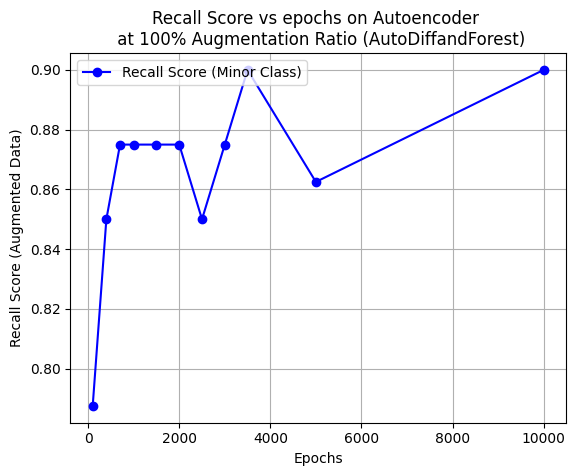

     Dataset Epochs on Auto Encoder  Recall_Original  Recall_Generated
0   diabetes                    100           0.6625            0.7875
1   diabetes                    400           0.6625            0.8500
2   diabetes                    700           0.6625            0.8750
3   diabetes                   1000           0.6625            0.8750
4   diabetes                   1500           0.6625            0.8750
5   diabetes                   2000           0.6625            0.8750
6   diabetes                   2500           0.6625            0.8500
7   diabetes                   3000           0.6625            0.8750
8   diabetes                   3500           0.6625            0.9000
9   diabetes                   5000           0.6625            0.8625
10  diabetes                  10000           0.6625            0.9000


In [3]:
strings_set = ['diabetes']

Model = 'AutoDiff'
metrics_list = []

epoch_list = [100, 400, 700, 1000,1500,2000,2500,3000,3500,5000,10000]

sample_size_percent = 100
for dataset in strings_set:
    recall_list = []
    for epoch in epoch_list:
        
        print(f"Recall Score for AutoDiff Autoencoder & ForestDIffusion for {dataset} dataset")
        file_path = f'..\\..\\..\\Datasets\\Original Data\\{dataset}.csv'
        # Read dataframe
        # print(file_path)
        real_df = pd.read_csv(file_path)
        #real_df = real_df.drop('url', axis=1)
        # # Step 2: Inspect the data and check for class imbalance
        # # Assuming the last column is the label, and the rest are features
        X = real_df.iloc[:, :-1].values  # Features
        y = real_df.iloc[:, -1].values  # Labels (binary classification)
        #  # Separate the minority class
        # Find the minority class
        
        real_minortiy = real_df[y == 1]

        threshold = 0.01 # Threshold for mixed-type variables
        parser = pce.DataFrameParser().fit(real_minortiy, threshold)
        ################################################################################################################
        # Auto-encoder hyper-parameters
        device = 'cuda' #@param {'type':'string'}
        n_epochs = epoch #@param {'type':'integer'}
        eps = 1e-5 #@param {type:"number"}
        weight_decay = 1e-6 #@param {'type':'number'}
        maximum_learning_rate = 1e-2 #@param {'type':'number'}
        lr = 2e-4 #@param {'type':'number'}
        hidden_size = 250
        num_layers = 3
        batch_size = real_minortiy.shape[0] # Full batch

        ds = ae.train_autoencoder(real_minortiy, hidden_size, num_layers, lr, weight_decay, n_epochs, batch_size, threshold)
        latent_features = ds[1].detach()

        from ForestDiffusion import ForestDiffusionModel


        # Convert to NumPy array
        array = latent_features.detach().cpu().numpy()
        forest_model = ForestDiffusionModel(array, label_y=None, n_t=50, duplicate_K=100, bin_indexes=[], cat_indexes=[], int_indexes=[], diffusion_type='flow', n_jobs=-1)
        minority_fake = forest_model.generate(batch_size=len(real_minortiy)) # Adjust the batch size to create a balanced dataset
        sample=torch.tensor(minority_fake, dtype=torch.float32)
        sample.shape
        gen_output = ds[0](sample, ds[2], ds[3])
        gen_df = pce.convert_to_table(real_minortiy, gen_output, threshold)

        output_directory =  f'..\\..\\..\\Datasets\\Synthetic Data\\'
        filename = f'{Model}+Forest_{dataset}_Synthetic.csv'
        output_file = os.path.join(output_directory, filename)
        # gen_df.to_csv(output_file, index=False) 


        # Select a random sample of the generated data
        num_samples_to_generate = len(real_minortiy)*sample_size_percent // 100
        selected_samples = gen_df.sample(n=num_samples_to_generate, random_state=42)  # For reproducibility
        # Syn _df will be the dataset after augmentation
        syn_df = pd.concat([real_df, selected_samples], ignore_index=True)


        augmented_output_directory =  f'..\\..\\..\\Datasets\\Augmented Data\\'
        filename = f'{Model}+Forest_{dataset}_Augmented.csv'
        augmented_output_file = os.path.join(augmented_output_directory, filename)
        # syn_df.to_csv(augmented_output_file, index=False) 

        import pandas as pd
        from sklearn.model_selection import train_test_split
        from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
        import numpy as np
        import matplotlib.pyplot as plt
        from ForestDiffusion import ForestDiffusionModel
        from sklearn.ensemble import RandomForestClassifier
        from sklearn.metrics import recall_score, f1_score

        # real_df = pd.read_csv(filename)
        # syn_filename = f'{string}/{Model}_{string}_Augmented.csv'

        # augmented_df = pd.read_csv(syn_filename)
        augmented_df=syn_df

        X = real_df.iloc[:, :-1].values  # Features
        y = real_df.iloc[:, -1].values 
        # Check and print the original class distribution
        unique, counts = np.unique(y, return_counts=True)
        class_dist_before = dict(zip(unique, counts))
        print(f"Class distribution before augmentation: {class_dist_before}")# Labels (binary classification)

        X_balanced = augmented_df.iloc[:, :-1].values  # Features
        y_balanced = augmented_df.iloc[:, -1].values  # Labels (binary classification)

        # Check and print the Augmented class distribution
        unique, counts = np.unique(y_balanced, return_counts=True)
        class_dist_after = dict(zip(unique, counts))
        print(f"Class distribution after augmentation: {class_dist_after}")

        # Step 6: Split the dataset into training and test sets (original and balanced)
        X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, y, test_size=0.3, random_state=42)
        X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

        # Step 7: Train a simple classifier on both original and generated datasets
        clf_orig = RandomForestClassifier(random_state=42)
        clf_orig.fit(X_train_orig, y_train_orig)

        clf_bal = RandomForestClassifier(random_state=42)
        clf_bal.fit(X_train_bal, y_train_bal)

        # Step 8: Predict and calculate recall and F1 scores
        y_pred_orig = clf_orig.predict(X_test_orig)
        y_pred_bal = clf_bal.predict(X_test_orig)

        prec_orig = precision_score(y_test_orig, y_pred_orig)
        prec_bal = precision_score(y_test_orig, y_pred_bal)
        
        recall_orig = recall_score(y_test_orig, y_pred_orig)
        recalls_bal = recall_score(y_test_orig, y_pred_bal)

        # f1_orig = f1_score(y_test_orig, y_pred_orig)
        # f1_bal = f1_score(y_test_orig, y_pred_bal)

        # Step 9: Print and store the performance metrics
        # Store metrics in a dictionary
        metrics = {
        "Dataset": dataset,
        "Epochs on Auto Encoder":f'{epoch}',
        "Recall_Original": recall_orig,
        "Recall_Generated": recalls_bal,
        
        }

        # Append the dictionary to the list
        metrics_list.append(metrics)
        recall_list.append(recalls_bal)

        # print(f"Precision score (original data): {prec_orig:.4f}")
        # print(f"Precision score (generated data): {prec_bal:.4f}")
        # print(f"Recall score (original data): {recall_orig:.4f}")
        # print(f"Recall score (generated data): {recalls_bal:.4f}")
        # print(f"F1 score (original data): {f1_orig:.4f}")
        # print(f"F1 score (generated data): {f1_bal:.4f}")
        # print("Classification Report (original data):\n", classification_report(y_test_orig, y_pred_orig))
        # print("Classification Report (generated data):\n", classification_report(y_test_orig, y_pred_bal))


        # print(f"Number of fake samples generated: {len(augmented_df)-len(real_df)}")
    import matplotlib.pyplot as plt

    # Create the plot
    plt.plot(epoch_list, recall_list, marker='o', linestyle='-', color='b', label='Recall Score (Minor Class)')
    # plt.plot(batch_size_list, major_class_data_recall_score_list, marker='o', linestyle='-', color='r', label='Recall Score (Major Class)')
    # Adding title and labels
    plt.title('Recall Score vs epochs on Autoencoder \n at 100% Augmentation Ratio (AutoDiffandForest)')
    plt.xlabel('Epochs')
    plt.ylabel('Recall Score (Augmented Data)')
    plt.legend(loc="upper left")

    # Show the grid
    plt.grid()

    # Display the plot
    
    diagram_name=f'Recall Score vs epochs on Autoencoder for {dataset} dataset(AutoDiffandForest).png'
    plt.savefig(diagram_name)
    plt.show()
    
    
import pandas as pd
metrics_df = pd.DataFrame(metrics_list)

# Save the DataFrame to a CSV file
metrics_df.to_csv("Auto_Diff_Forest_Different No. of Epochs at 100 percent augmentaion ratio.csv", index=False)

# Print the DataFrame
print(metrics_df)

Recall Score for AutoDiff Autoencoder & ForestDIffusion for HTRU dataset


  0%|          | 0/100 [00:00<?, ?it/s]

Class distribution before augmentation: {0: 16259, 1: 1639}
Class distribution after augmentation: {0.0: 16259, 1.0: 3278}
Recall Score for AutoDiff Autoencoder & ForestDIffusion for HTRU dataset


  0%|          | 0/400 [00:00<?, ?it/s]

Class distribution before augmentation: {0: 16259, 1: 1639}
Class distribution after augmentation: {0.0: 16259, 1.0: 3278}
Recall Score for AutoDiff Autoencoder & ForestDIffusion for HTRU dataset


  0%|          | 0/700 [00:00<?, ?it/s]

Class distribution before augmentation: {0: 16259, 1: 1639}
Class distribution after augmentation: {0.0: 16259, 1.0: 3278}
Recall Score for AutoDiff Autoencoder & ForestDIffusion for HTRU dataset


  0%|          | 0/1000 [00:00<?, ?it/s]

Class distribution before augmentation: {0: 16259, 1: 1639}
Class distribution after augmentation: {0.0: 16259, 1.0: 3278}
Recall Score for AutoDiff Autoencoder & ForestDIffusion for HTRU dataset


  0%|          | 0/1500 [00:00<?, ?it/s]

Class distribution before augmentation: {0: 16259, 1: 1639}
Class distribution after augmentation: {0.0: 16259, 1.0: 3278}
Recall Score for AutoDiff Autoencoder & ForestDIffusion for HTRU dataset


  0%|          | 0/2000 [00:00<?, ?it/s]

Class distribution before augmentation: {0: 16259, 1: 1639}
Class distribution after augmentation: {0.0: 16259, 1.0: 3278}
Recall Score for AutoDiff Autoencoder & ForestDIffusion for HTRU dataset


  0%|          | 0/2500 [00:00<?, ?it/s]

Class distribution before augmentation: {0: 16259, 1: 1639}
Class distribution after augmentation: {0.0: 16259, 1.0: 3278}
Recall Score for AutoDiff Autoencoder & ForestDIffusion for HTRU dataset


  0%|          | 0/3000 [00:00<?, ?it/s]

Class distribution before augmentation: {0: 16259, 1: 1639}
Class distribution after augmentation: {0.0: 16259, 1.0: 3278}
Recall Score for AutoDiff Autoencoder & ForestDIffusion for HTRU dataset


  0%|          | 0/3500 [00:00<?, ?it/s]

Class distribution before augmentation: {0: 16259, 1: 1639}
Class distribution after augmentation: {0.0: 16259, 1.0: 3278}
Recall Score for AutoDiff Autoencoder & ForestDIffusion for HTRU dataset


  0%|          | 0/5000 [00:00<?, ?it/s]

Class distribution before augmentation: {0: 16259, 1: 1639}
Class distribution after augmentation: {0.0: 16259, 1.0: 3278}
Recall Score for AutoDiff Autoencoder & ForestDIffusion for HTRU dataset


  0%|          | 0/10000 [00:00<?, ?it/s]

Class distribution before augmentation: {0: 16259, 1: 1639}
Class distribution after augmentation: {0.0: 16259, 1.0: 3278}


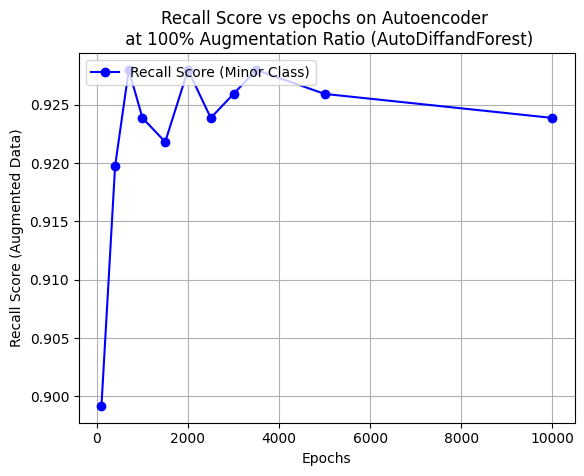

   Dataset Epochs on Auto Encoder  Recall_Original  Recall_Generated
0     HTRU                    100         0.835391          0.899177
1     HTRU                    400         0.835391          0.919753
2     HTRU                    700         0.835391          0.927984
3     HTRU                   1000         0.835391          0.923868
4     HTRU                   1500         0.835391          0.921811
5     HTRU                   2000         0.835391          0.927984
6     HTRU                   2500         0.835391          0.923868
7     HTRU                   3000         0.835391          0.925926
8     HTRU                   3500         0.835391          0.927984
9     HTRU                   5000         0.835391          0.925926
10    HTRU                  10000         0.835391          0.923868


In [4]:
strings_set = ['HTRU']

Model = 'AutoDiff'
metrics_list = []

epoch_list = [100, 400, 700, 1000,1500,2000,2500,3000,3500,5000,10000]

sample_size_percent = 100
for dataset in strings_set:
    recall_list = []
    for epoch in epoch_list:
        
        print(f"Recall Score for AutoDiff Autoencoder & ForestDIffusion for {dataset} dataset")
        file_path = f'..\\..\\..\\Datasets\\Original Data\\{dataset}.csv'
        # Read dataframe
        # print(file_path)
        real_df = pd.read_csv(file_path)
        #real_df = real_df.drop('url', axis=1)
        # # Step 2: Inspect the data and check for class imbalance
        # # Assuming the last column is the label, and the rest are features
        X = real_df.iloc[:, :-1].values  # Features
        y = real_df.iloc[:, -1].values  # Labels (binary classification)
        #  # Separate the minority class
        # Find the minority class
        
        real_minortiy = real_df[y == 1]

        threshold = 0.01 # Threshold for mixed-type variables
        parser = pce.DataFrameParser().fit(real_minortiy, threshold)
        ################################################################################################################
        # Auto-encoder hyper-parameters
        device = 'cuda' #@param {'type':'string'}
        n_epochs = epoch #@param {'type':'integer'}
        eps = 1e-5 #@param {type:"number"}
        weight_decay = 1e-6 #@param {'type':'number'}
        maximum_learning_rate = 1e-2 #@param {'type':'number'}
        lr = 2e-4 #@param {'type':'number'}
        hidden_size = 250
        num_layers = 3
        batch_size = real_minortiy.shape[0] # Full batch

        ds = ae.train_autoencoder(real_minortiy, hidden_size, num_layers, lr, weight_decay, n_epochs, batch_size, threshold)
        latent_features = ds[1].detach()

        from ForestDiffusion import ForestDiffusionModel


        # Convert to NumPy array
        array = latent_features.detach().cpu().numpy()
        forest_model = ForestDiffusionModel(array, label_y=None, n_t=50, duplicate_K=100, bin_indexes=[], cat_indexes=[], int_indexes=[], diffusion_type='flow', n_jobs=-1)
        minority_fake = forest_model.generate(batch_size=len(real_minortiy)) # Adjust the batch size to create a balanced dataset
        sample=torch.tensor(minority_fake, dtype=torch.float32)
        sample.shape
        gen_output = ds[0](sample, ds[2], ds[3])
        gen_df = pce.convert_to_table(real_minortiy, gen_output, threshold)

        output_directory =  f'..\\..\\..\\Datasets\\Synthetic Data\\'
        filename = f'{Model}+Forest_{dataset}_Synthetic.csv'
        output_file = os.path.join(output_directory, filename)
        # gen_df.to_csv(output_file, index=False) 


        # Select a random sample of the generated data
        num_samples_to_generate = len(real_minortiy)*sample_size_percent // 100
        selected_samples = gen_df.sample(n=num_samples_to_generate, random_state=42)  # For reproducibility
        # Syn _df will be the dataset after augmentation
        syn_df = pd.concat([real_df, selected_samples], ignore_index=True)


        augmented_output_directory =  f'..\\..\\..\\Datasets\\Augmented Data\\'
        filename = f'{Model}+Forest_{dataset}_Augmented.csv'
        augmented_output_file = os.path.join(augmented_output_directory, filename)
        # syn_df.to_csv(augmented_output_file, index=False) 

        import pandas as pd
        from sklearn.model_selection import train_test_split
        from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
        import numpy as np
        import matplotlib.pyplot as plt
        from ForestDiffusion import ForestDiffusionModel
        from sklearn.ensemble import RandomForestClassifier
        from sklearn.metrics import recall_score, f1_score

        # real_df = pd.read_csv(filename)
        # syn_filename = f'{string}/{Model}_{string}_Augmented.csv'

        # augmented_df = pd.read_csv(syn_filename)
        augmented_df=syn_df

        X = real_df.iloc[:, :-1].values  # Features
        y = real_df.iloc[:, -1].values 
        # Check and print the original class distribution
        unique, counts = np.unique(y, return_counts=True)
        class_dist_before = dict(zip(unique, counts))
        print(f"Class distribution before augmentation: {class_dist_before}")# Labels (binary classification)

        X_balanced = augmented_df.iloc[:, :-1].values  # Features
        y_balanced = augmented_df.iloc[:, -1].values  # Labels (binary classification)

        # Check and print the Augmented class distribution
        unique, counts = np.unique(y_balanced, return_counts=True)
        class_dist_after = dict(zip(unique, counts))
        print(f"Class distribution after augmentation: {class_dist_after}")

        # Step 6: Split the dataset into training and test sets (original and balanced)
        X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, y, test_size=0.3, random_state=42)
        X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

        # Step 7: Train a simple classifier on both original and generated datasets
        clf_orig = RandomForestClassifier(random_state=42)
        clf_orig.fit(X_train_orig, y_train_orig)

        clf_bal = RandomForestClassifier(random_state=42)
        clf_bal.fit(X_train_bal, y_train_bal)

        # Step 8: Predict and calculate recall and F1 scores
        y_pred_orig = clf_orig.predict(X_test_orig)
        y_pred_bal = clf_bal.predict(X_test_orig)

        prec_orig = precision_score(y_test_orig, y_pred_orig)
        prec_bal = precision_score(y_test_orig, y_pred_bal)
        
        recall_orig = recall_score(y_test_orig, y_pred_orig)
        recalls_bal = recall_score(y_test_orig, y_pred_bal)

        # f1_orig = f1_score(y_test_orig, y_pred_orig)
        # f1_bal = f1_score(y_test_orig, y_pred_bal)

        # Step 9: Print and store the performance metrics
        # Store metrics in a dictionary
        metrics = {
        "Dataset": dataset,
        "Epochs on Auto Encoder":f'{epoch}',
        "Recall_Original": recall_orig,
        "Recall_Generated": recalls_bal,
        
        }

        # Append the dictionary to the list
        metrics_list.append(metrics)
        recall_list.append(recalls_bal)

        # print(f"Precision score (original data): {prec_orig:.4f}")
        # print(f"Precision score (generated data): {prec_bal:.4f}")
        # print(f"Recall score (original data): {recall_orig:.4f}")
        # print(f"Recall score (generated data): {recalls_bal:.4f}")
        # print(f"F1 score (original data): {f1_orig:.4f}")
        # print(f"F1 score (generated data): {f1_bal:.4f}")
        # print("Classification Report (original data):\n", classification_report(y_test_orig, y_pred_orig))
        # print("Classification Report (generated data):\n", classification_report(y_test_orig, y_pred_bal))


        # print(f"Number of fake samples generated: {len(augmented_df)-len(real_df)}")
    import matplotlib.pyplot as plt

    # Create the plot
    plt.plot(epoch_list, recall_list, marker='o', linestyle='-', color='b', label='Recall Score (Minor Class)')
    # plt.plot(batch_size_list, major_class_data_recall_score_list, marker='o', linestyle='-', color='r', label='Recall Score (Major Class)')
    # Adding title and labels
    plt.title('Recall Score vs epochs on Autoencoder \n at 100% Augmentation Ratio (AutoDiffandForest)')
    plt.xlabel('Epochs')
    plt.ylabel('Recall Score (Augmented Data)')
    plt.legend(loc="upper left")

    # Show the grid
    plt.grid()

    # Display the plot
    
    diagram_name=f'Recall Score vs epochs on Autoencoder for {dataset} dataset(AutoDiffandForest).png'
    plt.savefig(diagram_name)
    plt.show()
    
    
import pandas as pd
metrics_df = pd.DataFrame(metrics_list)

# Save the DataFrame to a CSV file
metrics_df.to_csv("Auto_Diff_Forest_Different No. of Epochs at 100 percent augmentaion ratio.csv", index=False)

# Print the DataFrame
print(metrics_df)

Recall Score for AutoDiff Autoencoder & ForestDIffusion for mammography dataset


  0%|          | 0/100 [00:00<?, ?it/s]

Class distribution before augmentation: {-1: 10923, 1: 260}
Class distribution after augmentation: {-1.0: 10923, 1.0: 520}
Recall Score for AutoDiff Autoencoder & ForestDIffusion for mammography dataset


  0%|          | 0/400 [00:00<?, ?it/s]

Class distribution before augmentation: {-1: 10923, 1: 260}
Class distribution after augmentation: {-1.0: 10923, 1.0: 520}
Recall Score for AutoDiff Autoencoder & ForestDIffusion for mammography dataset


  0%|          | 0/700 [00:00<?, ?it/s]

Class distribution before augmentation: {-1: 10923, 1: 260}
Class distribution after augmentation: {-1.0: 10923, 1.0: 520}
Recall Score for AutoDiff Autoencoder & ForestDIffusion for mammography dataset


  0%|          | 0/1000 [00:00<?, ?it/s]

Class distribution before augmentation: {-1: 10923, 1: 260}
Class distribution after augmentation: {-1.0: 10923, 1.0: 520}
Recall Score for AutoDiff Autoencoder & ForestDIffusion for mammography dataset


  0%|          | 0/1500 [00:00<?, ?it/s]

Class distribution before augmentation: {-1: 10923, 1: 260}
Class distribution after augmentation: {-1.0: 10923, 1.0: 520}
Recall Score for AutoDiff Autoencoder & ForestDIffusion for mammography dataset


  0%|          | 0/2000 [00:00<?, ?it/s]

Class distribution before augmentation: {-1: 10923, 1: 260}
Class distribution after augmentation: {-1.0: 10923, 1.0: 520}
Recall Score for AutoDiff Autoencoder & ForestDIffusion for mammography dataset


  0%|          | 0/2500 [00:00<?, ?it/s]

Class distribution before augmentation: {-1: 10923, 1: 260}
Class distribution after augmentation: {-1.0: 10923, 1.0: 520}
Recall Score for AutoDiff Autoencoder & ForestDIffusion for mammography dataset


  0%|          | 0/3000 [00:00<?, ?it/s]

Class distribution before augmentation: {-1: 10923, 1: 260}
Class distribution after augmentation: {-1.0: 10923, 1.0: 520}
Recall Score for AutoDiff Autoencoder & ForestDIffusion for mammography dataset


  0%|          | 0/3500 [00:00<?, ?it/s]

Class distribution before augmentation: {-1: 10923, 1: 260}
Class distribution after augmentation: {-1.0: 10923, 1.0: 520}
Recall Score for AutoDiff Autoencoder & ForestDIffusion for mammography dataset


  0%|          | 0/5000 [00:00<?, ?it/s]

Class distribution before augmentation: {-1: 10923, 1: 260}
Class distribution after augmentation: {-1.0: 10923, 1.0: 520}
Recall Score for AutoDiff Autoencoder & ForestDIffusion for mammography dataset


  0%|          | 0/10000 [00:00<?, ?it/s]

Class distribution before augmentation: {-1: 10923, 1: 260}
Class distribution after augmentation: {-1.0: 10923, 1.0: 520}


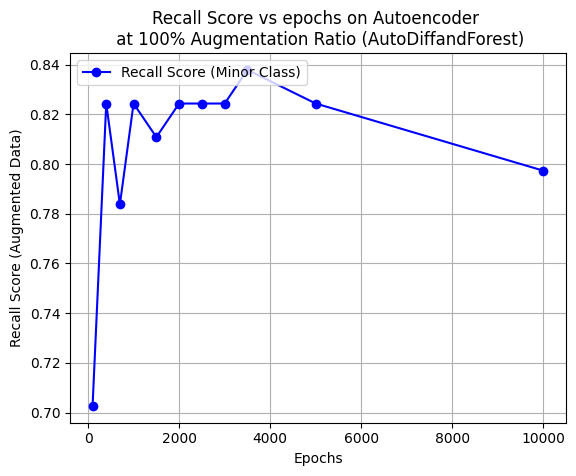

        Dataset Epochs on Auto Encoder  Recall_Original  Recall_Generated
0   mammography                    100         0.594595          0.702703
1   mammography                    400         0.594595          0.824324
2   mammography                    700         0.594595          0.783784
3   mammography                   1000         0.594595          0.824324
4   mammography                   1500         0.594595          0.810811
5   mammography                   2000         0.594595          0.824324
6   mammography                   2500         0.594595          0.824324
7   mammography                   3000         0.594595          0.824324
8   mammography                   3500         0.594595          0.837838
9   mammography                   5000         0.594595          0.824324
10  mammography                  10000         0.594595          0.797297


In [5]:
strings_set = ['mammography']

Model = 'AutoDiff'
metrics_list = []

epoch_list = [100, 400, 700, 1000,1500,2000,2500,3000,3500,5000,10000]

sample_size_percent = 100
for dataset in strings_set:
    recall_list = []
    for epoch in epoch_list:
        
        print(f"Recall Score for AutoDiff Autoencoder & ForestDIffusion for {dataset} dataset")
        file_path = f'..\\..\\..\\Datasets\\Original Data\\{dataset}.csv'
        # Read dataframe
        # print(file_path)
        real_df = pd.read_csv(file_path)
        #real_df = real_df.drop('url', axis=1)
        # # Step 2: Inspect the data and check for class imbalance
        # # Assuming the last column is the label, and the rest are features
        X = real_df.iloc[:, :-1].values  # Features
        y = real_df.iloc[:, -1].values  # Labels (binary classification)
        #  # Separate the minority class
        # Find the minority class
        
        real_minortiy = real_df[y == 1]

        threshold = 0.01 # Threshold for mixed-type variables
        parser = pce.DataFrameParser().fit(real_minortiy, threshold)
        ################################################################################################################
        # Auto-encoder hyper-parameters
        device = 'cuda' #@param {'type':'string'}
        n_epochs = epoch #@param {'type':'integer'}
        eps = 1e-5 #@param {type:"number"}
        weight_decay = 1e-6 #@param {'type':'number'}
        maximum_learning_rate = 1e-2 #@param {'type':'number'}
        lr = 2e-4 #@param {'type':'number'}
        hidden_size = 250
        num_layers = 3
        batch_size = real_minortiy.shape[0] # Full batch

        ds = ae.train_autoencoder(real_minortiy, hidden_size, num_layers, lr, weight_decay, n_epochs, batch_size, threshold)
        latent_features = ds[1].detach()

        from ForestDiffusion import ForestDiffusionModel


        # Convert to NumPy array
        array = latent_features.detach().cpu().numpy()
        forest_model = ForestDiffusionModel(array, label_y=None, n_t=50, duplicate_K=100, bin_indexes=[], cat_indexes=[], int_indexes=[], diffusion_type='flow', n_jobs=-1)
        minority_fake = forest_model.generate(batch_size=len(real_minortiy)) # Adjust the batch size to create a balanced dataset
        sample=torch.tensor(minority_fake, dtype=torch.float32)
        sample.shape
        gen_output = ds[0](sample, ds[2], ds[3])
        gen_df = pce.convert_to_table(real_minortiy, gen_output, threshold)

        output_directory =  f'..\\..\\..\\Datasets\\Synthetic Data\\'
        filename = f'{Model}+Forest_{dataset}_Synthetic.csv'
        output_file = os.path.join(output_directory, filename)
        # gen_df.to_csv(output_file, index=False) 


        # Select a random sample of the generated data
        num_samples_to_generate = len(real_minortiy)*sample_size_percent // 100
        selected_samples = gen_df.sample(n=num_samples_to_generate, random_state=42)  # For reproducibility
        # Syn _df will be the dataset after augmentation
        syn_df = pd.concat([real_df, selected_samples], ignore_index=True)


        augmented_output_directory =  f'..\\..\\..\\Datasets\\Augmented Data\\'
        filename = f'{Model}+Forest_{dataset}_Augmented.csv'
        augmented_output_file = os.path.join(augmented_output_directory, filename)
        # syn_df.to_csv(augmented_output_file, index=False) 

        import pandas as pd
        from sklearn.model_selection import train_test_split
        from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
        import numpy as np
        import matplotlib.pyplot as plt
        from ForestDiffusion import ForestDiffusionModel
        from sklearn.ensemble import RandomForestClassifier
        from sklearn.metrics import recall_score, f1_score

        # real_df = pd.read_csv(filename)
        # syn_filename = f'{string}/{Model}_{string}_Augmented.csv'

        # augmented_df = pd.read_csv(syn_filename)
        augmented_df=syn_df

        X = real_df.iloc[:, :-1].values  # Features
        y = real_df.iloc[:, -1].values 
        # Check and print the original class distribution
        unique, counts = np.unique(y, return_counts=True)
        class_dist_before = dict(zip(unique, counts))
        print(f"Class distribution before augmentation: {class_dist_before}")# Labels (binary classification)

        X_balanced = augmented_df.iloc[:, :-1].values  # Features
        y_balanced = augmented_df.iloc[:, -1].values  # Labels (binary classification)

        # Check and print the Augmented class distribution
        unique, counts = np.unique(y_balanced, return_counts=True)
        class_dist_after = dict(zip(unique, counts))
        print(f"Class distribution after augmentation: {class_dist_after}")

        # Step 6: Split the dataset into training and test sets (original and balanced)
        X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, y, test_size=0.3, random_state=42)
        X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

        # Step 7: Train a simple classifier on both original and generated datasets
        clf_orig = RandomForestClassifier(random_state=42)
        clf_orig.fit(X_train_orig, y_train_orig)

        clf_bal = RandomForestClassifier(random_state=42)
        clf_bal.fit(X_train_bal, y_train_bal)

        # Step 8: Predict and calculate recall and F1 scores
        y_pred_orig = clf_orig.predict(X_test_orig)
        y_pred_bal = clf_bal.predict(X_test_orig)

        prec_orig = precision_score(y_test_orig, y_pred_orig)
        prec_bal = precision_score(y_test_orig, y_pred_bal)
        
        recall_orig = recall_score(y_test_orig, y_pred_orig)
        recalls_bal = recall_score(y_test_orig, y_pred_bal)

        # f1_orig = f1_score(y_test_orig, y_pred_orig)
        # f1_bal = f1_score(y_test_orig, y_pred_bal)

        # Step 9: Print and store the performance metrics
        # Store metrics in a dictionary
        metrics = {
        "Dataset": dataset,
        "Epochs on Auto Encoder":f'{epoch}',
        "Recall_Original": recall_orig,
        "Recall_Generated": recalls_bal,
        
        }

        # Append the dictionary to the list
        metrics_list.append(metrics)
        recall_list.append(recalls_bal)

        # print(f"Precision score (original data): {prec_orig:.4f}")
        # print(f"Precision score (generated data): {prec_bal:.4f}")
        # print(f"Recall score (original data): {recall_orig:.4f}")
        # print(f"Recall score (generated data): {recalls_bal:.4f}")
        # print(f"F1 score (original data): {f1_orig:.4f}")
        # print(f"F1 score (generated data): {f1_bal:.4f}")
        # print("Classification Report (original data):\n", classification_report(y_test_orig, y_pred_orig))
        # print("Classification Report (generated data):\n", classification_report(y_test_orig, y_pred_bal))


        # print(f"Number of fake samples generated: {len(augmented_df)-len(real_df)}")
    import matplotlib.pyplot as plt

    # Create the plot
    plt.plot(epoch_list, recall_list, marker='o', linestyle='-', color='b', label='Recall Score (Minor Class)')
    # plt.plot(batch_size_list, major_class_data_recall_score_list, marker='o', linestyle='-', color='r', label='Recall Score (Major Class)')
    # Adding title and labels
    plt.title('Recall Score vs epochs on Autoencoder \n at 100% Augmentation Ratio (AutoDiffandForest)')
    plt.xlabel('Epochs')
    plt.ylabel('Recall Score (Augmented Data)')
    plt.legend(loc="upper left")

    # Show the grid
    plt.grid()

    # Display the plot
    
    diagram_name=f'Recall Score vs epochs on Autoencoder for {dataset} dataset(AutoDiffandForest).png'
    plt.savefig(diagram_name)
    plt.show()
    
    
import pandas as pd
metrics_df = pd.DataFrame(metrics_list)

# Save the DataFrame to a CSV file
metrics_df.to_csv("Auto_Diff_Forest_Different No. of Epochs at 100 percent augmentaion ratio.csv", index=False)

# Print the DataFrame
print(metrics_df)

Recall Score for AutoDiff Autoencoder & ForestDIffusion for creditcard_sampled dataset


  0%|          | 0/100 [00:00<?, ?it/s]

Class distribution before augmentation: {0: 4000, 1: 50}
Class distribution after augmentation: {0.0: 4000, 1.0: 100}
Recall Score for AutoDiff Autoencoder & ForestDIffusion for creditcard_sampled dataset


  0%|          | 0/400 [00:00<?, ?it/s]

Class distribution before augmentation: {0: 4000, 1: 50}
Class distribution after augmentation: {0.0: 4000, 1.0: 100}
Recall Score for AutoDiff Autoencoder & ForestDIffusion for creditcard_sampled dataset


  0%|          | 0/700 [00:00<?, ?it/s]

Class distribution before augmentation: {0: 4000, 1: 50}
Class distribution after augmentation: {0.0: 4000, 1.0: 100}
Recall Score for AutoDiff Autoencoder & ForestDIffusion for creditcard_sampled dataset


  0%|          | 0/1000 [00:00<?, ?it/s]

Class distribution before augmentation: {0: 4000, 1: 50}
Class distribution after augmentation: {0.0: 4000, 1.0: 100}
Recall Score for AutoDiff Autoencoder & ForestDIffusion for creditcard_sampled dataset


  0%|          | 0/1500 [00:00<?, ?it/s]

Class distribution before augmentation: {0: 4000, 1: 50}
Class distribution after augmentation: {0.0: 4000, 1.0: 100}
Recall Score for AutoDiff Autoencoder & ForestDIffusion for creditcard_sampled dataset


  0%|          | 0/2000 [00:00<?, ?it/s]

Class distribution before augmentation: {0: 4000, 1: 50}
Class distribution after augmentation: {0.0: 4000, 1.0: 100}
Recall Score for AutoDiff Autoencoder & ForestDIffusion for creditcard_sampled dataset


  0%|          | 0/2500 [00:00<?, ?it/s]

Class distribution before augmentation: {0: 4000, 1: 50}
Class distribution after augmentation: {0.0: 4000, 1.0: 100}
Recall Score for AutoDiff Autoencoder & ForestDIffusion for creditcard_sampled dataset


  0%|          | 0/3000 [00:00<?, ?it/s]

Class distribution before augmentation: {0: 4000, 1: 50}
Class distribution after augmentation: {0.0: 4000, 1.0: 100}
Recall Score for AutoDiff Autoencoder & ForestDIffusion for creditcard_sampled dataset


  0%|          | 0/3500 [00:00<?, ?it/s]

Class distribution before augmentation: {0: 4000, 1: 50}
Class distribution after augmentation: {0.0: 4000, 1.0: 100}
Recall Score for AutoDiff Autoencoder & ForestDIffusion for creditcard_sampled dataset


  0%|          | 0/5000 [00:00<?, ?it/s]

Class distribution before augmentation: {0: 4000, 1: 50}
Class distribution after augmentation: {0.0: 4000, 1.0: 100}
Recall Score for AutoDiff Autoencoder & ForestDIffusion for creditcard_sampled dataset


  0%|          | 0/10000 [00:00<?, ?it/s]

Class distribution before augmentation: {0: 4000, 1: 50}
Class distribution after augmentation: {0.0: 4000, 1.0: 100}


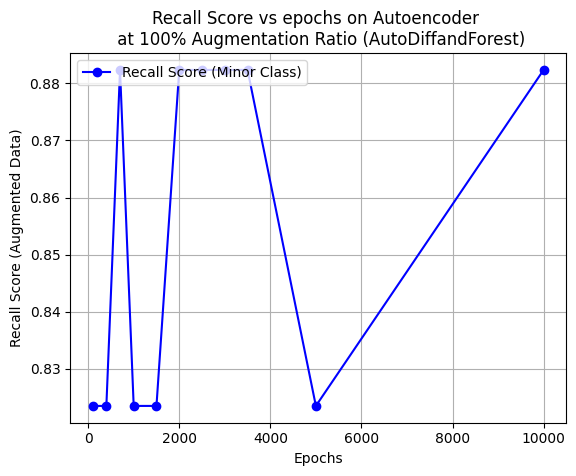

               Dataset Epochs on Auto Encoder  Recall_Original  \
0   creditcard_sampled                    100         0.764706   
1   creditcard_sampled                    400         0.764706   
2   creditcard_sampled                    700         0.764706   
3   creditcard_sampled                   1000         0.764706   
4   creditcard_sampled                   1500         0.764706   
5   creditcard_sampled                   2000         0.764706   
6   creditcard_sampled                   2500         0.764706   
7   creditcard_sampled                   3000         0.764706   
8   creditcard_sampled                   3500         0.764706   
9   creditcard_sampled                   5000         0.764706   
10  creditcard_sampled                  10000         0.764706   

    Recall_Generated  
0           0.823529  
1           0.823529  
2           0.882353  
3           0.823529  
4           0.823529  
5           0.882353  
6           0.882353  
7           0.882353  


In [6]:
strings_set = ['creditcard_sampled']

Model = 'AutoDiff'
metrics_list = []

epoch_list = [100, 400, 700, 1000,1500,2000,2500,3000,3500,5000,10000]

sample_size_percent = 100
for dataset in strings_set:
    recall_list = []
    for epoch in epoch_list:
        
        print(f"Recall Score for AutoDiff Autoencoder & ForestDIffusion for {dataset} dataset")
        file_path = f'..\\..\\..\\Datasets\\Original Data\\{dataset}.csv'
        # Read dataframe
        # print(file_path)
        real_df = pd.read_csv(file_path)
        #real_df = real_df.drop('url', axis=1)
        # # Step 2: Inspect the data and check for class imbalance
        # # Assuming the last column is the label, and the rest are features
        X = real_df.iloc[:, :-1].values  # Features
        y = real_df.iloc[:, -1].values  # Labels (binary classification)
        #  # Separate the minority class
        # Find the minority class
        
        real_minortiy = real_df[y == 1]

        threshold = 0.01 # Threshold for mixed-type variables
        parser = pce.DataFrameParser().fit(real_minortiy, threshold)
        ################################################################################################################
        # Auto-encoder hyper-parameters
        device = 'cuda' #@param {'type':'string'}
        n_epochs = epoch #@param {'type':'integer'}
        eps = 1e-5 #@param {type:"number"}
        weight_decay = 1e-6 #@param {'type':'number'}
        maximum_learning_rate = 1e-2 #@param {'type':'number'}
        lr = 2e-4 #@param {'type':'number'}
        hidden_size = 250
        num_layers = 3
        batch_size = real_minortiy.shape[0] # Full batch

        ds = ae.train_autoencoder(real_minortiy, hidden_size, num_layers, lr, weight_decay, n_epochs, batch_size, threshold)
        latent_features = ds[1].detach()

        from ForestDiffusion import ForestDiffusionModel


        # Convert to NumPy array
        array = latent_features.detach().cpu().numpy()
        forest_model = ForestDiffusionModel(array, label_y=None, n_t=50, duplicate_K=100, bin_indexes=[], cat_indexes=[], int_indexes=[], diffusion_type='flow', n_jobs=-1)
        minority_fake = forest_model.generate(batch_size=len(real_minortiy)) # Adjust the batch size to create a balanced dataset
        sample=torch.tensor(minority_fake, dtype=torch.float32)
        sample.shape
        gen_output = ds[0](sample, ds[2], ds[3])
        gen_df = pce.convert_to_table(real_minortiy, gen_output, threshold)

        output_directory =  f'..\\..\\..\\Datasets\\Synthetic Data\\'
        filename = f'{Model}+Forest_{dataset}_Synthetic.csv'
        output_file = os.path.join(output_directory, filename)
        # gen_df.to_csv(output_file, index=False) 


        # Select a random sample of the generated data
        num_samples_to_generate = len(real_minortiy)*sample_size_percent // 100
        selected_samples = gen_df.sample(n=num_samples_to_generate, random_state=42)  # For reproducibility
        # Syn _df will be the dataset after augmentation
        syn_df = pd.concat([real_df, selected_samples], ignore_index=True)


        augmented_output_directory =  f'..\\..\\..\\Datasets\\Augmented Data\\'
        filename = f'{Model}+Forest_{dataset}_Augmented.csv'
        augmented_output_file = os.path.join(augmented_output_directory, filename)
        # syn_df.to_csv(augmented_output_file, index=False) 

        import pandas as pd
        from sklearn.model_selection import train_test_split
        from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
        import numpy as np
        import matplotlib.pyplot as plt
        from ForestDiffusion import ForestDiffusionModel
        from sklearn.ensemble import RandomForestClassifier
        from sklearn.metrics import recall_score, f1_score

        # real_df = pd.read_csv(filename)
        # syn_filename = f'{string}/{Model}_{string}_Augmented.csv'

        # augmented_df = pd.read_csv(syn_filename)
        augmented_df=syn_df

        X = real_df.iloc[:, :-1].values  # Features
        y = real_df.iloc[:, -1].values 
        # Check and print the original class distribution
        unique, counts = np.unique(y, return_counts=True)
        class_dist_before = dict(zip(unique, counts))
        print(f"Class distribution before augmentation: {class_dist_before}")# Labels (binary classification)

        X_balanced = augmented_df.iloc[:, :-1].values  # Features
        y_balanced = augmented_df.iloc[:, -1].values  # Labels (binary classification)

        # Check and print the Augmented class distribution
        unique, counts = np.unique(y_balanced, return_counts=True)
        class_dist_after = dict(zip(unique, counts))
        print(f"Class distribution after augmentation: {class_dist_after}")

        # Step 6: Split the dataset into training and test sets (original and balanced)
        X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, y, test_size=0.3, random_state=42)
        X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

        # Step 7: Train a simple classifier on both original and generated datasets
        clf_orig = RandomForestClassifier(random_state=42)
        clf_orig.fit(X_train_orig, y_train_orig)

        clf_bal = RandomForestClassifier(random_state=42)
        clf_bal.fit(X_train_bal, y_train_bal)

        # Step 8: Predict and calculate recall and F1 scores
        y_pred_orig = clf_orig.predict(X_test_orig)
        y_pred_bal = clf_bal.predict(X_test_orig)

        prec_orig = precision_score(y_test_orig, y_pred_orig)
        prec_bal = precision_score(y_test_orig, y_pred_bal)
        
        recall_orig = recall_score(y_test_orig, y_pred_orig)
        recalls_bal = recall_score(y_test_orig, y_pred_bal)

        # f1_orig = f1_score(y_test_orig, y_pred_orig)
        # f1_bal = f1_score(y_test_orig, y_pred_bal)

        # Step 9: Print and store the performance metrics
        # Store metrics in a dictionary
        metrics = {
        "Dataset": dataset,
        "Epochs on Auto Encoder":f'{epoch}',
        "Recall_Original": recall_orig,
        "Recall_Generated": recalls_bal,
        
        }

        # Append the dictionary to the list
        metrics_list.append(metrics)
        recall_list.append(recalls_bal)

        # print(f"Precision score (original data): {prec_orig:.4f}")
        # print(f"Precision score (generated data): {prec_bal:.4f}")
        # print(f"Recall score (original data): {recall_orig:.4f}")
        # print(f"Recall score (generated data): {recalls_bal:.4f}")
        # print(f"F1 score (original data): {f1_orig:.4f}")
        # print(f"F1 score (generated data): {f1_bal:.4f}")
        # print("Classification Report (original data):\n", classification_report(y_test_orig, y_pred_orig))
        # print("Classification Report (generated data):\n", classification_report(y_test_orig, y_pred_bal))


        # print(f"Number of fake samples generated: {len(augmented_df)-len(real_df)}")
    import matplotlib.pyplot as plt

    # Create the plot
    plt.plot(epoch_list, recall_list, marker='o', linestyle='-', color='b', label='Recall Score (Minor Class)')
    # plt.plot(batch_size_list, major_class_data_recall_score_list, marker='o', linestyle='-', color='r', label='Recall Score (Major Class)')
    # Adding title and labels
    plt.title('Recall Score vs epochs on Autoencoder \n at 100% Augmentation Ratio (AutoDiffandForest)')
    plt.xlabel('Epochs')
    plt.ylabel('Recall Score (Augmented Data)')
    plt.legend(loc="upper left")

    # Show the grid
    plt.grid()

    # Display the plot
    
    diagram_name=f'Recall Score vs epochs on Autoencoder for {dataset} dataset(AutoDiffandForest).png'
    plt.savefig(diagram_name)
    plt.show()
    
    
import pandas as pd
metrics_df = pd.DataFrame(metrics_list)

# Save the DataFrame to a CSV file
metrics_df.to_csv("Auto_Diff_Forest_Different No. of Epochs at 100 percent augmentaion ratio.csv", index=False)

# Print the DataFrame
print(metrics_df)

Recall Score for AutoDiff Autoencoder & ForestDIffusion for creditcard_sampled dataset


  0%|          | 0/100 [00:00<?, ?it/s]

Class distribution before augmentation: {0: 4000, 1: 50}
Class distribution after augmentation: {0.0: 4000, 1.0: 100}
Recall Score for AutoDiff Autoencoder & ForestDIffusion for creditcard_sampled dataset


  0%|          | 0/400 [00:00<?, ?it/s]

Class distribution before augmentation: {0: 4000, 1: 50}
Class distribution after augmentation: {0.0: 4000, 1.0: 100}
Recall Score for AutoDiff Autoencoder & ForestDIffusion for creditcard_sampled dataset


  0%|          | 0/700 [00:00<?, ?it/s]

Class distribution before augmentation: {0: 4000, 1: 50}
Class distribution after augmentation: {0.0: 4000, 1.0: 100}
Recall Score for AutoDiff Autoencoder & ForestDIffusion for creditcard_sampled dataset


  0%|          | 0/1000 [00:00<?, ?it/s]

Class distribution before augmentation: {0: 4000, 1: 50}
Class distribution after augmentation: {0.0: 4000, 1.0: 100}
Recall Score for AutoDiff Autoencoder & ForestDIffusion for creditcard_sampled dataset


  0%|          | 0/1500 [00:00<?, ?it/s]

Class distribution before augmentation: {0: 4000, 1: 50}
Class distribution after augmentation: {0.0: 4000, 1.0: 100}
Recall Score for AutoDiff Autoencoder & ForestDIffusion for creditcard_sampled dataset


  0%|          | 0/2000 [00:00<?, ?it/s]

Class distribution before augmentation: {0: 4000, 1: 50}
Class distribution after augmentation: {0.0: 4000, 1.0: 100}
Recall Score for AutoDiff Autoencoder & ForestDIffusion for creditcard_sampled dataset


  0%|          | 0/2500 [00:00<?, ?it/s]

Class distribution before augmentation: {0: 4000, 1: 50}
Class distribution after augmentation: {0.0: 4000, 1.0: 100}
Recall Score for AutoDiff Autoencoder & ForestDIffusion for creditcard_sampled dataset


  0%|          | 0/3000 [00:00<?, ?it/s]

Class distribution before augmentation: {0: 4000, 1: 50}
Class distribution after augmentation: {0.0: 4000, 1.0: 100}
Recall Score for AutoDiff Autoencoder & ForestDIffusion for creditcard_sampled dataset


  0%|          | 0/3500 [00:00<?, ?it/s]

Class distribution before augmentation: {0: 4000, 1: 50}
Class distribution after augmentation: {0.0: 4000, 1.0: 100}
Recall Score for AutoDiff Autoencoder & ForestDIffusion for creditcard_sampled dataset


  0%|          | 0/5000 [00:00<?, ?it/s]

Class distribution before augmentation: {0: 4000, 1: 50}
Class distribution after augmentation: {0.0: 4000, 1.0: 100}
Recall Score for AutoDiff Autoencoder & ForestDIffusion for creditcard_sampled dataset


  0%|          | 0/10000 [00:00<?, ?it/s]

Class distribution before augmentation: {0: 4000, 1: 50}
Class distribution after augmentation: {0.0: 4000, 1.0: 100}


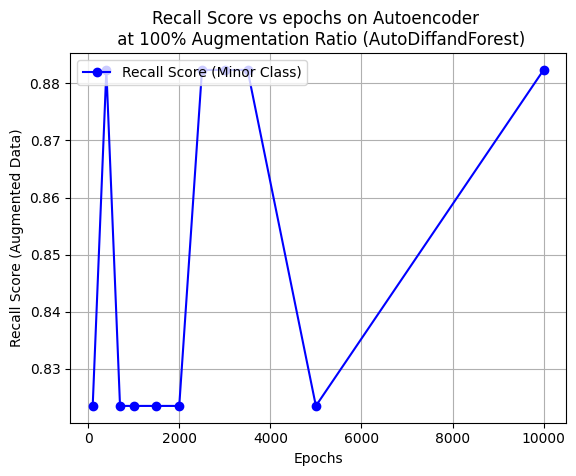

               Dataset Epochs on Auto Encoder  Recall_Original  \
0   creditcard_sampled                    100         0.764706   
1   creditcard_sampled                    400         0.764706   
2   creditcard_sampled                    700         0.764706   
3   creditcard_sampled                   1000         0.764706   
4   creditcard_sampled                   1500         0.764706   
5   creditcard_sampled                   2000         0.764706   
6   creditcard_sampled                   2500         0.764706   
7   creditcard_sampled                   3000         0.764706   
8   creditcard_sampled                   3500         0.764706   
9   creditcard_sampled                   5000         0.764706   
10  creditcard_sampled                  10000         0.764706   

    Recall_Generated  
0           0.823529  
1           0.882353  
2           0.823529  
3           0.823529  
4           0.823529  
5           0.823529  
6           0.882353  
7           0.882353  


In [7]:
strings_set = ['creditcard_sampled']

Model = 'AutoDiff'
metrics_list = []

epoch_list = [100, 400, 700, 1000,1500,2000,2500,3000,3500,5000,10000]

sample_size_percent = 100
for dataset in strings_set:
    recall_list = []
    for epoch in epoch_list:
        
        print(f"Recall Score for AutoDiff Autoencoder & ForestDIffusion for {dataset} dataset")
        file_path = f'..\\..\\..\\Datasets\\Original Data\\{dataset}.csv'
        # Read dataframe
        # print(file_path)
        real_df = pd.read_csv(file_path)
        #real_df = real_df.drop('url', axis=1)
        # # Step 2: Inspect the data and check for class imbalance
        # # Assuming the last column is the label, and the rest are features
        X = real_df.iloc[:, :-1].values  # Features
        y = real_df.iloc[:, -1].values  # Labels (binary classification)
        #  # Separate the minority class
        # Find the minority class
        
        real_minortiy = real_df[y == 1]

        threshold = 0.01 # Threshold for mixed-type variables
        parser = pce.DataFrameParser().fit(real_minortiy, threshold)
        ################################################################################################################
        # Auto-encoder hyper-parameters
        device = 'cuda' #@param {'type':'string'}
        n_epochs = epoch #@param {'type':'integer'}
        eps = 1e-5 #@param {type:"number"}
        weight_decay = 1e-6 #@param {'type':'number'}
        maximum_learning_rate = 1e-2 #@param {'type':'number'}
        lr = 2e-4 #@param {'type':'number'}
        hidden_size = 250
        num_layers = 3
        batch_size = real_minortiy.shape[0] # Full batch

        ds = ae.train_autoencoder(real_minortiy, hidden_size, num_layers, lr, weight_decay, n_epochs, batch_size, threshold)
        latent_features = ds[1].detach()

        from ForestDiffusion import ForestDiffusionModel


        # Convert to NumPy array
        array = latent_features.detach().cpu().numpy()
        forest_model = ForestDiffusionModel(array, label_y=None, n_t=50, duplicate_K=100, bin_indexes=[], cat_indexes=[], int_indexes=[], diffusion_type='flow', n_jobs=-1)
        minority_fake = forest_model.generate(batch_size=len(real_minortiy)) # Adjust the batch size to create a balanced dataset
        sample=torch.tensor(minority_fake, dtype=torch.float32)
        sample.shape
        gen_output = ds[0](sample, ds[2], ds[3])
        gen_df = pce.convert_to_table(real_minortiy, gen_output, threshold)

        output_directory =  f'..\\..\\..\\Datasets\\Synthetic Data\\'
        filename = f'{Model}+Forest_{dataset}_Synthetic.csv'
        output_file = os.path.join(output_directory, filename)
        # gen_df.to_csv(output_file, index=False) 


        # Select a random sample of the generated data
        num_samples_to_generate = len(real_minortiy)*sample_size_percent // 100
        selected_samples = gen_df.sample(n=num_samples_to_generate, random_state=42)  # For reproducibility
        # Syn _df will be the dataset after augmentation
        syn_df = pd.concat([real_df, selected_samples], ignore_index=True)


        augmented_output_directory =  f'..\\..\\..\\Datasets\\Augmented Data\\'
        filename = f'{Model}+Forest_{dataset}_Augmented.csv'
        augmented_output_file = os.path.join(augmented_output_directory, filename)
        # syn_df.to_csv(augmented_output_file, index=False) 

        import pandas as pd
        from sklearn.model_selection import train_test_split
        from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
        import numpy as np
        import matplotlib.pyplot as plt
        from ForestDiffusion import ForestDiffusionModel
        from sklearn.ensemble import RandomForestClassifier
        from sklearn.metrics import recall_score, f1_score

        # real_df = pd.read_csv(filename)
        # syn_filename = f'{string}/{Model}_{string}_Augmented.csv'

        # augmented_df = pd.read_csv(syn_filename)
        augmented_df=syn_df

        X = real_df.iloc[:, :-1].values  # Features
        y = real_df.iloc[:, -1].values 
        # Check and print the original class distribution
        unique, counts = np.unique(y, return_counts=True)
        class_dist_before = dict(zip(unique, counts))
        print(f"Class distribution before augmentation: {class_dist_before}")# Labels (binary classification)

        X_balanced = augmented_df.iloc[:, :-1].values  # Features
        y_balanced = augmented_df.iloc[:, -1].values  # Labels (binary classification)

        # Check and print the Augmented class distribution
        unique, counts = np.unique(y_balanced, return_counts=True)
        class_dist_after = dict(zip(unique, counts))
        print(f"Class distribution after augmentation: {class_dist_after}")

        # Step 6: Split the dataset into training and test sets (original and balanced)
        X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, y, test_size=0.3, random_state=42)
        X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

        # Step 7: Train a simple classifier on both original and generated datasets
        clf_orig = RandomForestClassifier(random_state=42)
        clf_orig.fit(X_train_orig, y_train_orig)

        clf_bal = RandomForestClassifier(random_state=42)
        clf_bal.fit(X_train_bal, y_train_bal)

        # Step 8: Predict and calculate recall and F1 scores
        y_pred_orig = clf_orig.predict(X_test_orig)
        y_pred_bal = clf_bal.predict(X_test_orig)

        prec_orig = precision_score(y_test_orig, y_pred_orig)
        prec_bal = precision_score(y_test_orig, y_pred_bal)
        
        recall_orig = recall_score(y_test_orig, y_pred_orig)
        recalls_bal = recall_score(y_test_orig, y_pred_bal)

        # f1_orig = f1_score(y_test_orig, y_pred_orig)
        # f1_bal = f1_score(y_test_orig, y_pred_bal)

        # Step 9: Print and store the performance metrics
        # Store metrics in a dictionary
        metrics = {
        "Dataset": dataset,
        "Epochs on Auto Encoder":f'{epoch}',
        "Recall_Original": recall_orig,
        "Recall_Generated": recalls_bal,
        
        }

        # Append the dictionary to the list
        metrics_list.append(metrics)
        recall_list.append(recalls_bal)

        # print(f"Precision score (original data): {prec_orig:.4f}")
        # print(f"Precision score (generated data): {prec_bal:.4f}")
        # print(f"Recall score (original data): {recall_orig:.4f}")
        # print(f"Recall score (generated data): {recalls_bal:.4f}")
        # print(f"F1 score (original data): {f1_orig:.4f}")
        # print(f"F1 score (generated data): {f1_bal:.4f}")
        # print("Classification Report (original data):\n", classification_report(y_test_orig, y_pred_orig))
        # print("Classification Report (generated data):\n", classification_report(y_test_orig, y_pred_bal))


        # print(f"Number of fake samples generated: {len(augmented_df)-len(real_df)}")
    import matplotlib.pyplot as plt

    # Create the plot
    plt.plot(epoch_list, recall_list, marker='o', linestyle='-', color='b', label='Recall Score (Minor Class)')
    # plt.plot(batch_size_list, major_class_data_recall_score_list, marker='o', linestyle='-', color='r', label='Recall Score (Major Class)')
    # Adding title and labels
    plt.title('Recall Score vs epochs on Autoencoder \n at 100% Augmentation Ratio (AutoDiffandForest)')
    plt.xlabel('Epochs')
    plt.ylabel('Recall Score (Augmented Data)')
    plt.legend(loc="upper left")

    # Show the grid
    plt.grid()

    # Display the plot
    
    diagram_name=f'Recall Score vs epochs on Autoencoder for {dataset} dataset(AutoDiffandForest).png'
    plt.savefig(diagram_name)
    plt.show()
    
    
import pandas as pd
metrics_df = pd.DataFrame(metrics_list)

# Save the DataFrame to a CSV file
metrics_df.to_csv("Auto_Diff_Forest_Different No. of Epochs at 100 percent augmentaion ratio.csv", index=False)

# Print the DataFrame
print(metrics_df)

In [ ]:
strings_set = ['spambase']

Model = 'AutoDiff'
metrics_list = []

epoch_list = [100, 400, 700, 1000,1500,2000,2500,3000,3500,5000,10000]

sample_size_percent = 100
for dataset in strings_set:
    recall_list = []
    for epoch in epoch_list:
        
        print(f"Recall Score for AutoDiff Autoencoder & ForestDIffusion for {dataset} dataset")
        file_path = f'..\\..\\..\\Datasets\\Original Data\\{dataset}.csv'
        # Read dataframe
        # print(file_path)
        real_df = pd.read_csv(file_path)
        #real_df = real_df.drop('url', axis=1)
        # # Step 2: Inspect the data and check for class imbalance
        # # Assuming the last column is the label, and the rest are features
        X = real_df.iloc[:, :-1].values  # Features
        y = real_df.iloc[:, -1].values  # Labels (binary classification)
        #  # Separate the minority class
        # Find the minority class
        
        real_minortiy = real_df[y == 1]

        threshold = 0.01 # Threshold for mixed-type variables
        parser = pce.DataFrameParser().fit(real_minortiy, threshold)
        ################################################################################################################
        # Auto-encoder hyper-parameters
        device = 'cuda' #@param {'type':'string'}
        n_epochs = epoch #@param {'type':'integer'}
        eps = 1e-5 #@param {type:"number"}
        weight_decay = 1e-6 #@param {'type':'number'}
        maximum_learning_rate = 1e-2 #@param {'type':'number'}
        lr = 2e-4 #@param {'type':'number'}
        hidden_size = 250
        num_layers = 3
        batch_size = real_minortiy.shape[0] # Full batch

        ds = ae.train_autoencoder(real_minortiy, hidden_size, num_layers, lr, weight_decay, n_epochs, batch_size, threshold)
        latent_features = ds[1].detach()

        from ForestDiffusion import ForestDiffusionModel


        # Convert to NumPy array
        array = latent_features.detach().cpu().numpy()
        forest_model = ForestDiffusionModel(array, label_y=None, n_t=50, duplicate_K=100, bin_indexes=[], cat_indexes=[], int_indexes=[], diffusion_type='flow', n_jobs=-1)
        minority_fake = forest_model.generate(batch_size=len(real_minortiy)) # Adjust the batch size to create a balanced dataset
        sample=torch.tensor(minority_fake, dtype=torch.float32)
        sample.shape
        gen_output = ds[0](sample, ds[2], ds[3])
        gen_df = pce.convert_to_table(real_minortiy, gen_output, threshold)

        output_directory =  f'..\\..\\..\\Datasets\\Synthetic Data\\'
        filename = f'{Model}+Forest_{dataset}_Synthetic.csv'
        output_file = os.path.join(output_directory, filename)
        # gen_df.to_csv(output_file, index=False) 


        # Select a random sample of the generated data
        num_samples_to_generate = len(real_minortiy)*sample_size_percent // 100
        selected_samples = gen_df.sample(n=num_samples_to_generate, random_state=42)  # For reproducibility
        # Syn _df will be the dataset after augmentation
        syn_df = pd.concat([real_df, selected_samples], ignore_index=True)


        augmented_output_directory =  f'..\\..\\..\\Datasets\\Augmented Data\\'
        filename = f'{Model}+Forest_{dataset}_Augmented.csv'
        augmented_output_file = os.path.join(augmented_output_directory, filename)
        # syn_df.to_csv(augmented_output_file, index=False) 

        import pandas as pd
        from sklearn.model_selection import train_test_split
        from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
        import numpy as np
        import matplotlib.pyplot as plt
        from ForestDiffusion import ForestDiffusionModel
        from sklearn.ensemble import RandomForestClassifier
        from sklearn.metrics import recall_score, f1_score

        # real_df = pd.read_csv(filename)
        # syn_filename = f'{string}/{Model}_{string}_Augmented.csv'

        # augmented_df = pd.read_csv(syn_filename)
        augmented_df=syn_df

        X = real_df.iloc[:, :-1].values  # Features
        y = real_df.iloc[:, -1].values 
        # Check and print the original class distribution
        unique, counts = np.unique(y, return_counts=True)
        class_dist_before = dict(zip(unique, counts))
        print(f"Class distribution before augmentation: {class_dist_before}")# Labels (binary classification)

        X_balanced = augmented_df.iloc[:, :-1].values  # Features
        y_balanced = augmented_df.iloc[:, -1].values  # Labels (binary classification)

        # Check and print the Augmented class distribution
        unique, counts = np.unique(y_balanced, return_counts=True)
        class_dist_after = dict(zip(unique, counts))
        print(f"Class distribution after augmentation: {class_dist_after}")

        # Step 6: Split the dataset into training and test sets (original and balanced)
        X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, y, test_size=0.3, random_state=42)
        X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

        # Step 7: Train a simple classifier on both original and generated datasets
        clf_orig = RandomForestClassifier(random_state=42)
        clf_orig.fit(X_train_orig, y_train_orig)

        clf_bal = RandomForestClassifier(random_state=42)
        clf_bal.fit(X_train_bal, y_train_bal)

        # Step 8: Predict and calculate recall and F1 scores
        y_pred_orig = clf_orig.predict(X_test_orig)
        y_pred_bal = clf_bal.predict(X_test_orig)

        prec_orig = precision_score(y_test_orig, y_pred_orig)
        prec_bal = precision_score(y_test_orig, y_pred_bal)
        
        recall_orig = recall_score(y_test_orig, y_pred_orig)
        recalls_bal = recall_score(y_test_orig, y_pred_bal)

        # f1_orig = f1_score(y_test_orig, y_pred_orig)
        # f1_bal = f1_score(y_test_orig, y_pred_bal)

        # Step 9: Print and store the performance metrics
        # Store metrics in a dictionary
        metrics = {
        "Dataset": dataset,
        "Epochs on Auto Encoder":f'{epoch}',
        "Recall_Original": recall_orig,
        "Recall_Generated": recalls_bal,
        
        }

        # Append the dictionary to the list
        metrics_list.append(metrics)
        recall_list.append(recalls_bal)

        # print(f"Precision score (original data): {prec_orig:.4f}")
        # print(f"Precision score (generated data): {prec_bal:.4f}")
        # print(f"Recall score (original data): {recall_orig:.4f}")
        # print(f"Recall score (generated data): {recalls_bal:.4f}")
        # print(f"F1 score (original data): {f1_orig:.4f}")
        # print(f"F1 score (generated data): {f1_bal:.4f}")
        # print("Classification Report (original data):\n", classification_report(y_test_orig, y_pred_orig))
        # print("Classification Report (generated data):\n", classification_report(y_test_orig, y_pred_bal))


        # print(f"Number of fake samples generated: {len(augmented_df)-len(real_df)}")
    import matplotlib.pyplot as plt

    # Create the plot
    plt.plot(epoch_list, recall_list, marker='o', linestyle='-', color='b', label='Recall Score (Minor Class)')
    # plt.plot(batch_size_list, major_class_data_recall_score_list, marker='o', linestyle='-', color='r', label='Recall Score (Major Class)')
    # Adding title and labels
    plt.title('Recall Score vs epochs on Autoencoder \n at 100% Augmentation Ratio (AutoDiffandForest)')
    plt.xlabel('Epochs')
    plt.ylabel('Recall Score (Augmented Data)')
    plt.legend(loc="upper left")

    # Show the grid
    plt.grid()

    # Display the plot
    
    diagram_name=f'Recall Score vs epochs on Autoencoder for {dataset} dataset(AutoDiffandForest).png'
    plt.savefig(diagram_name)
    plt.show()
    
    
import pandas as pd
metrics_df = pd.DataFrame(metrics_list)

# Save the DataFrame to a CSV file
metrics_df.to_csv("Auto_Diff_Forest_Different No. of Epochs at 100 percent augmentaion ratio.csv", index=False)

# Print the DataFrame
print(metrics_df)

Recall Score for AutoDiff Autoencoder & ForestDIffusion for spambase dataset


  0%|          | 0/100 [00:00<?, ?it/s]

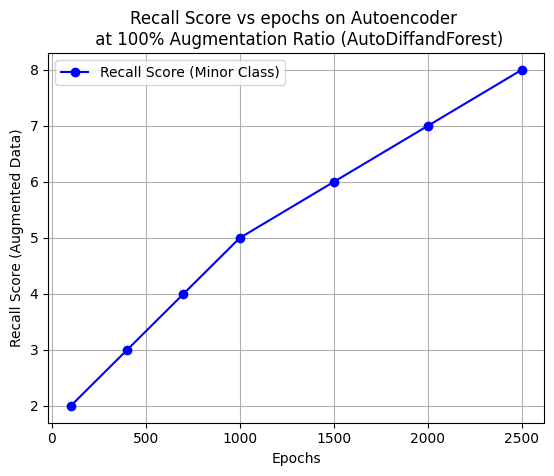

In [ ]:
import matplotlib.pyplot as plt
epoch_list_list = [100, 400, 700, 1000,1500,2000,2500]
recall_list = [2, 3, 4, 5, 6, 7, 8]
# Create the plot
plt.plot(epoch_list_list, recall_list, marker='o', linestyle='-', color='b', label='Recall Score (Minor Class)')
# plt.plot(batch_size_list, major_class_data_recall_score_list, marker='o', linestyle='-', color='r', label='Recall Score (Major Class)')
# Adding title and labels
plt.title('Recall Score vs epochs on Autoencoder \n at 100% Augmentation Ratio (AutoDiffandForest)')
plt.xlabel('Epochs')
plt.ylabel('Recall Score (Augmented Data)')
plt.legend(loc="upper left")

# Show the grid
plt.grid()

# Display the plot

diagram_name=f'Recall Score vs epochs on Autoencoder for dataset(AutoDiffandForest).png'
# plt.savefig(diagram_name)
plt.show()

In [6]:
import pandas as pd
from io import StringIO
metric_df =pd.DataFrame()
# Your space-separated data
data = """
Dataset Epochs_on_Auto_Encoder Recall_Original Recall_Generated
diabetes 100 0.6625 0.7875
diabetes 400 0.6625 0.8500
diabetes 700 0.6625 0.8750
diabetes 1000 0.6625 0.8750
diabetes 1500 0.6625 0.8750
diabetes 2000 0.6625 0.8750
diabetes 2500 0.6625 0.8500
diabetes 3000 0.6625 0.8750
diabetes 3500 0.6625 0.9000
diabetes 5000 0.6625 0.8625
diabetes 10000 0.6625 0.9000
"""

# Read the data into a pandas DataFrame
df = pd.read_csv(StringIO(data), delim_whitespace=True)

# Save as a CSV file
#df.to_csv("space_separated_data.csv", index=False)

# Output
# print(df)
metric_df=pd.concat([metric_df,df])
print(metric_df)


     Dataset  Epochs_on_Auto_Encoder  Recall_Original  Recall_Generated
0   diabetes                     100           0.6625            0.7875
1   diabetes                     400           0.6625            0.8500
2   diabetes                     700           0.6625            0.8750
3   diabetes                    1000           0.6625            0.8750
4   diabetes                    1500           0.6625            0.8750
5   diabetes                    2000           0.6625            0.8750
6   diabetes                    2500           0.6625            0.8500
7   diabetes                    3000           0.6625            0.8750
8   diabetes                    3500           0.6625            0.9000
9   diabetes                    5000           0.6625            0.8625
10  diabetes                   10000           0.6625            0.9000
     Dataset  Epochs_on_Auto_Encoder  Recall_Original  Recall_Generated
0   diabetes                     100           0.6625           